In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [3]:
df = pd.read_csv("dataset_collection/dataset.csv")
df["date"] = pd.to_datetime(df['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332243 entries, 0 to 332242
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   product_id    332243 non-null  int64         
 1   count         332243 non-null  int64         
 2   price         332243 non-null  float64       
 3   total         332243 non-null  float64       
 4   date          332243 non-null  datetime64[ns]
 5   product_name  332221 non-null  object        
 6   group_name    332243 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 17.7+ MB


### Selecting data about periodic product

In [5]:
def create_demand_time_series_for(df):
    df = df.groupby(pd.Grouper(freq='ME', key='date')).sum().reset_index()
    df['month'] = (df.date - pd.to_datetime("2019-01-01")).apply(lambda x: x.days / 30)
    return df


### Sample product demand curve

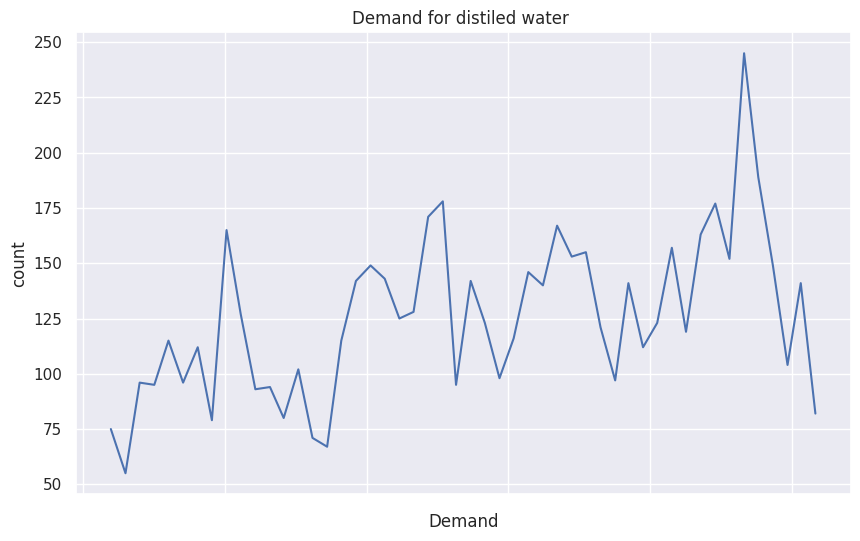

In [6]:
example_df = create_demand_time_series_for(df[df['product_id'] == 30991620])

example_df = example_df[(example_df["date"] > "2019-01-01") & (example_df['date'] < "2024-01-01")]
example_df['month'] = (example_df.date - pd.to_datetime("2019-01-01")).apply(lambda x: x.days / 30)

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=example_df, x='month', y='count')

plt.title("Demand for distiled water ")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.xlabel("Demand")

ax.set_xticklabels([])
plt.show()

### Seasonal product demand

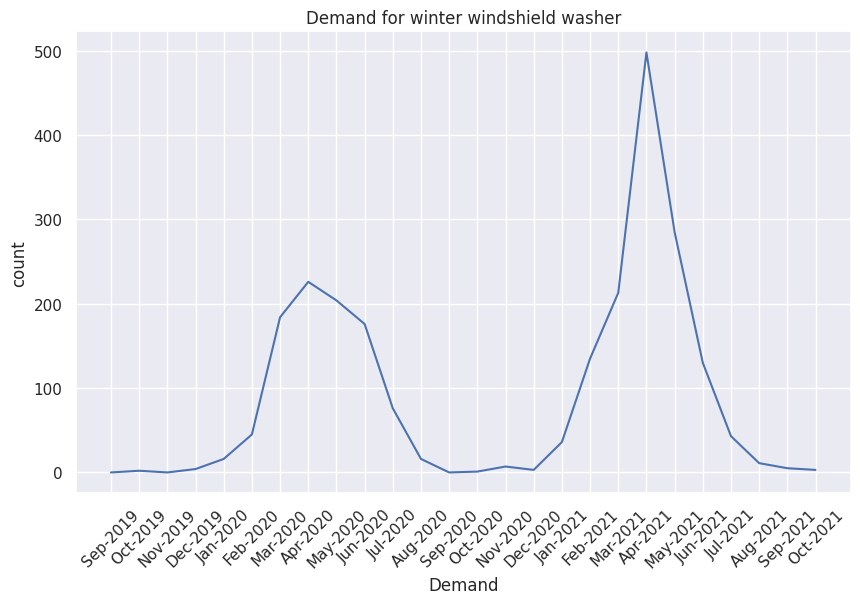

In [8]:
seasonal_product_1 = create_demand_time_series_for(df[df['product_id'] == 37283229])

seasonal_product_1 = seasonal_product_1[(seasonal_product_1["date"] > "2020-05-01") & (seasonal_product_1['date'] < "2022-07-01")]
seasonal_product_1['month'] = example_df.date.dt.strftime("%b-%Y")

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=seasonal_product_1, x='month', y='count')

plt.title("Demand for winter windshield washer")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.xlabel("Demand")

plt.show()

### Demand

In [ ]:
total_demand_ts = create_demand_time_series_for(df)

total_demand_ts = total_demand_ts[(total_demand_ts["date"] > "2019-02-08") & (total_demand_ts['date'] < "2023-04-30")]
total_demand_ts['month'] = total_demand_ts.date.dt.strftime("%b-%Y")

top_ids = df.groupby('product_id').size().reset_index(name='size').sort_values(by='size', ascending=False).product_id[:4]


top_products_ts = [
    create_demand_time_series_for(df[df['product_id']==product_id])
    for product_id in top_ids
]

top_ids

6427    30991620
7421    37283229
1191     1396584
7261    36926200
7675    38377621
1210     1396651
7676    38377622
1117     1395152
568      1026969
582      1027057
Name: product_id, dtype: int64

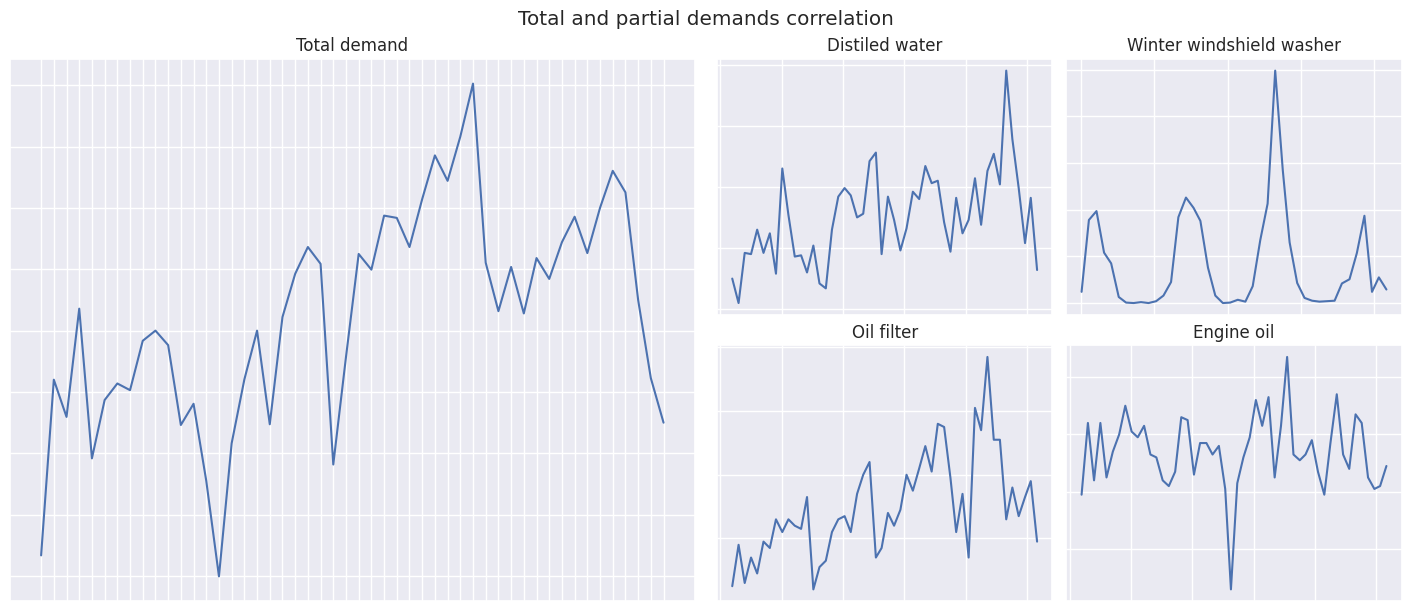

In [20]:

fig = plt.figure(constrained_layout=True, figsize=(14, 6))
fig.suptitle("Total and partial demands correlation")

subfigures = fig.subfigures(nrows=1, ncols=2)


total_ax = subfigures[0].subplots(nrows=1, ncols=1)

sns.lineplot(data=total_demand_ts, x='month', y='count', ax=total_ax)
total_ax.set_title("Total demand")
total_ax.set_xlabel("")
total_ax.set_ylabel("")
total_ax.set_xticklabels([])
total_ax.set_yticklabels([])

sub_axes = subfigures[1].subplots(nrows=2, ncols=2)

sns.lineplot(data=top_products_ts[0], x='month', y='count', ax=sub_axes[0][0])
sub_axes[0][0].set_title("Distiled water")
sns.lineplot(data=top_products_ts[1], x='month', y='count', ax=sub_axes[0][1])
sub_axes[0][1].set_title("Winter windshield washer")
sns.lineplot(data=top_products_ts[2], x='month', y='count', ax=sub_axes[1][0])
sub_axes[1][0].set_title("Oil filter")
sns.lineplot(data=top_products_ts[3], x='month', y='count', ax=sub_axes[1][1])
sub_axes[1][1].set_title("Engine oil")

for i in range(2):
    for j in range(2):
        sub_axes[i][j].set_xlabel("")
        sub_axes[i][j].set_ylabel("")
        sub_axes[i][j].set_xticklabels([])
        sub_axes[i][j].set_yticklabels([])



In [ ]:
cross_df = pd.read_csv('dataset_collection/crosses.csv')


,product_id,cross_product_id
0,42219306,44560075
1,2283784,5871020
2,36925441,37037941
3,1203948,51156853
4,2380323,40980404
...,...,...
53257,2230003,50551019
53258,2230003,57495989
53259,3224426,44331583
53260,3224426,45188328


In [ ]:
top_ids = df.groupby('product_id').size().reset_index(name='size').sort_values(by='size', ascending=False).product_id[:10]
crosses_ids = cross_df[cross_df.product_id.isin(top_ids)].cross_product_id
df[df.product_id.isin(crosses_ids)].groupby('product_id').size().reset_index(name='size').sort_values(by='size', ascending=False)


,product_id,cross_product_id
229,1775045,1026969
230,1775045,1026973
231,1775045,50564040
232,1775045,50564043
233,1775045,50999841
234,1775045,54929739
235,1775045,61690526


In [55]:


ids = cross_df[cross_df.product_id==1775045].cross_product_id
df[df.product_id.isin(ids)].groupby('product_id').size().reset_index(name='size').sort_values(by='size', ascending=False)

,product_id,size
0,1026969,1964
2,50564040,58
5,54929739,50
3,50564043,41
4,50999841,22
1,1026973,14
6,61690526,2


<Axes: xlabel='month', ylabel='count'>

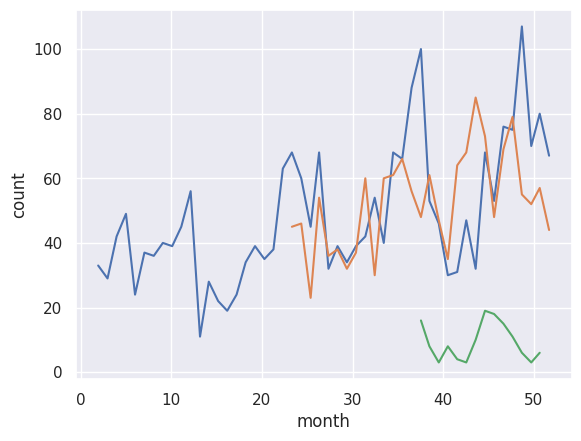

In [ ]:
# product_id: 38377622, cross_product_ids: 55253299, 59384119

main_product_ts = create_demand_time_series_for(df[df.product_id==38377622])
cross_1_ts = create_demand_time_series_for(df[df.product_id==55253299])
cross_2_ts = create_demand_time_series_for(df[df.product_id==59384119])


sns.lineplot(data=main_product_ts, x='month', y='count')
sns.lineplot(data=cross_1_ts, x='month', y='count')
sns.lineplot(data=cross_2_ts, x='month', y='count')

<Axes: xlabel='month', ylabel='count'>

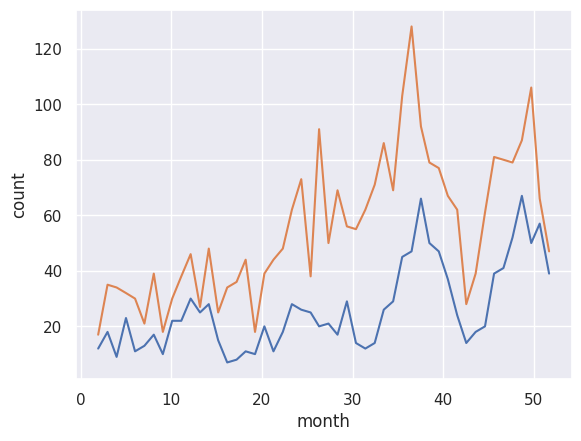

In [57]:
light_ts = create_demand_time_series_for(df[df.product_id==1775045])
cross = create_demand_time_series_for(df[df.product_id==1026969])

sns.lineplot(data=light_ts, x='month', y='count')
sns.lineplot(data=cross, x='month', y='count')